# Exploratory data analysis [EDA]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from project_lib.data_loaders import LoadData
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

## Data deatials

In [2]:
df = LoadData().get_data()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1,1,110.0,264.0,0,0,132.0,0,1.2,2,0,7,1
299,68.0,1,4,144.0,193.0,1,0,141.0,0,3.4,2,2,7,1
300,57.0,1,4,130.0,131.0,0,0,115.0,1,1.2,2,1,7,1
301,57.0,0,2,130.0,236.0,0,2,174.0,0,0.0,2,1,3,1


In [3]:
df.target.value_counts(normalize=True)

0    0.541254
1    0.458746
Name: target, dtype: float64

This indicates that the data has an acceptable balance in its labels. **But** what about `categorical features`?

In [4]:
categorical_features_info = (
    df
    .loc[:, df.dtypes == 'category']
    .nunique()
    .drop('target')
    .sort_index()
    .rename('#Cat')
    .to_frame()
    
)

In [5]:
def categoreis_frac(normalize:bool):
    def func(clmn):
        assert isinstance(
            df.dtypes[clmn],
            pd.CategoricalDtype
        ), f'The columns `{clmn}` is not `Categorical` Dtype'
        a = df[clmn].value_counts(normalize=normalize)
        return ' ,'.join(
            [f'{lbl}:{frc:{"0.2f" if normalize else ""}}' for lbl, frc in a.items()])
    return func

In [6]:
categorical_features_info['Cat:Count'] = (
    categorical_features_info
    .index
    .map(categoreis_frac(False))
)
categorical_features_info['Cat:Frac'] = (
    categorical_features_info
    .index
    .map(categoreis_frac(True))
)
categorical_features_info

,#Cat,Cat:Count,Cat:Frac
ca,4,"0:180 ,1:65 ,2:38 ,3:20","0:0.59 ,1:0.21 ,2:0.13 ,3:0.07"
cp,4,"4:144 ,3:86 ,2:50 ,1:23","4:0.48 ,3:0.28 ,2:0.17 ,1:0.08"
exang,2,"0:204 ,1:99","0:0.67 ,1:0.33"
fbs,2,"0:258 ,1:45","0:0.85 ,1:0.15"
restecg,3,"0:151 ,2:148 ,1:4","0:0.50 ,2:0.49 ,1:0.01"
sex,2,"1:206 ,0:97","1:0.68 ,0:0.32"
slope,3,"1:142 ,2:140 ,3:21","1:0.47 ,2:0.46 ,3:0.07"
thal,3,"3:168 ,7:117 ,6:18","3:0.55 ,7:0.39 ,6:0.06"


The above table shows that we **do not have** the same number of samples for different categories of each feature.

## Plots

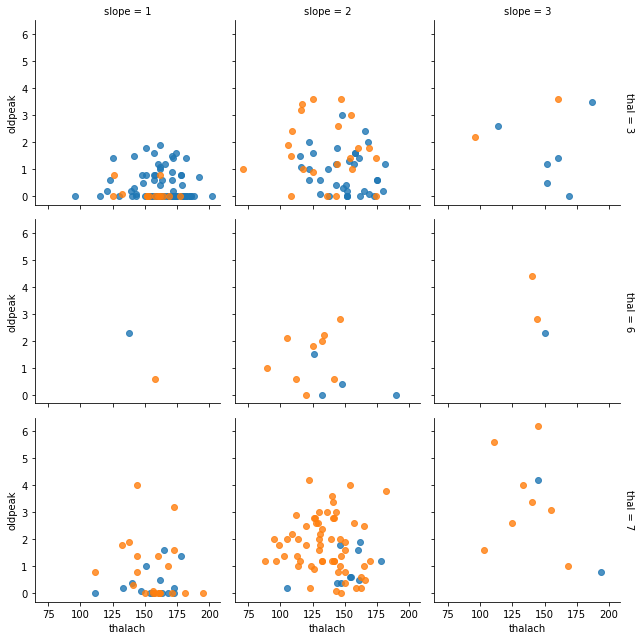

In [7]:
g = sns.FacetGrid(df, row="thal", col="slope", hue='target', margin_titles=True)
_ = g.map(sns.regplot, "thalach", "oldpeak", fit_reg=False)

According to above plots, `oldpeak`, `thalach` and `slope` are not proper features but `thal` may be a useful feature.

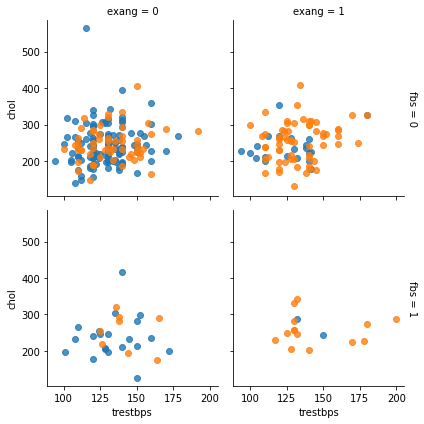

In [8]:
g = sns.FacetGrid(df, row="fbs", col="exang", hue='target', margin_titles=True)
_ = g.map(sns.regplot, "trestbps", "chol", fit_reg=False)

According to above plots, `fbs`, `chol` and `trestbps` are not proper features but `exang` may be a useful feature.

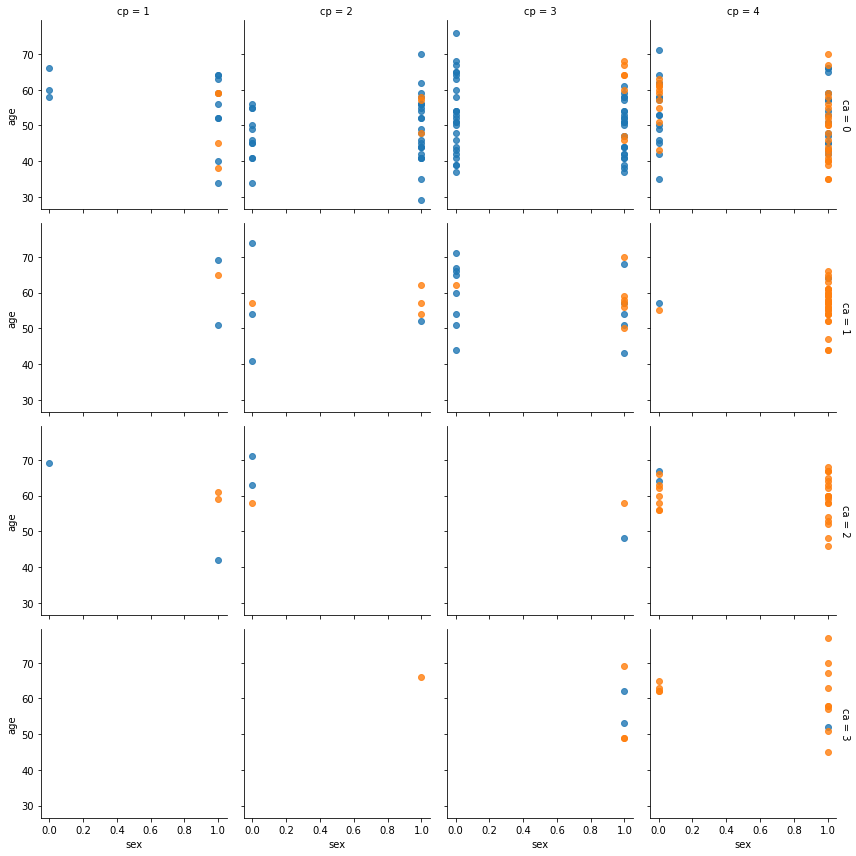

In [9]:
g = sns.FacetGrid(df, row="ca", col="cp", hue='target', margin_titles=True)
_ = g.map(sns.regplot, "sex", "age", fit_reg=False)

According to above plots, `age` is not a proper feature but `cp`, `ca`, and `sex` may be useful features.

## Summary
Base on some simple plot I predicted that `cp`, `ca`, `sex`, `exang` and `thal` should be more important features. and These features don't have equal samples for each category.
In the following, I will examine various models for a more detailed accuracy. Based on this simple survey that has been done. I take two ways. First, based on recognized important features, train some different models. In the next step, I do this with feature selection techniques.

For the next phase, I will do the same process using unsupervised techniques preprocessing.